# Language Detection
See the Dataset on https://www.kaggle.com/datasets/basilb2s/language-detection.

In [24]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter("ignore")

In [4]:
# Loading the dataset
df = pd.read_csv("Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
df.describe(include='all')

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


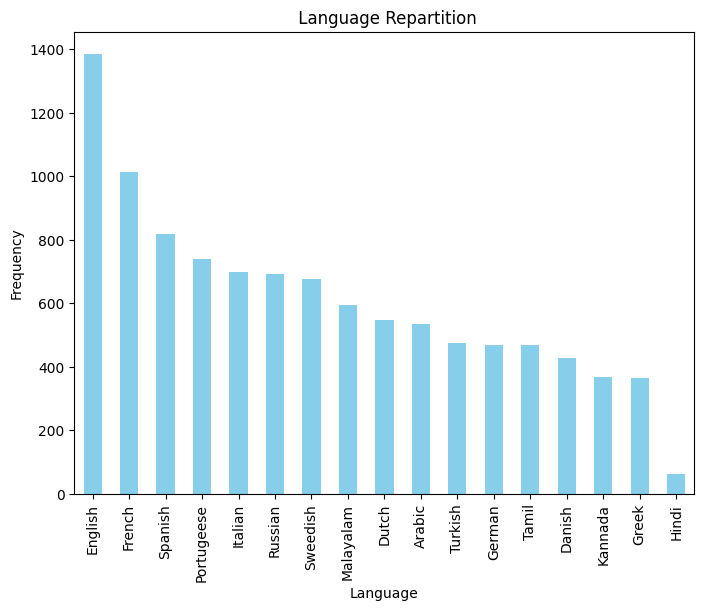

In [7]:
# 
plt.figure(figsize=(8, 6))
df['Language'].value_counts().plot(kind='bar', color='skyblue')
plt.title(' Language Repartition')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

In [8]:
X = df['Text']
y = df['Language']

In [12]:
# Label encoding
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [13]:
# remove special characters
df_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    df_list.append(text)

In [15]:
# divide data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
# creating bag of words using countvectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train = cv.transform(X_train).toarray()
x_test  = cv.transform(X_test).toarray()

## Model

In [20]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(x_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [23]:
print("Accuracy is :",ac)

Accuracy is : 0.980174081237911


## Pipeline

In [28]:
pipeline = Pipeline([('vectorizer', cv), ('multinomialNB', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [29]:
y_pred2 = pipeline.predict(X_test)
ac2 = accuracy_score(y_test, y_pred2)
print("Accuracy is :",ac2)

Accuracy is : 0.980174081237911


## Download the model

In [30]:
version = "0.1.0"
model_filename = "language-detection-model-" + version
with open(model_filename,'wb') as f:
    pickle.dump(pipeline, f)

### test the downloaded model

In [32]:
with open(model_filename,'rb') as f:
    loaded_model = pickle.load(f)

In [33]:
y_pred = loaded_model.predict(X_test)
ac2 = accuracy_score(y_test, y_pred)
print("Accuracy is :",ac)

Accuracy is : 0.980174081237911
